In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

from dataset import VNAgriDataset

# Đọc dữ liệu rau, quả

In [2]:
with open("../../data/Rau, qua", "r", encoding="utf-16") as file:
    rauqua = file.read()

In [3]:
rauqua_df = pd.read_html(rauqua)[0]
rauqua_df.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_4016\1453333364.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  rauqua_df = pd.read_html(rauqua)[0]


(29593, 8)

In [4]:
rauqua_df.head()

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
0,Bắp cải,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
1,Bắp cải thảo,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
2,Bưởi da xanh,Sơn La,Bán lẻ,VNĐ/quả,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,35000.0
3,Bưởi Diễn,Sơn La,Bán lẻ,VNĐ/quả,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
4,Cà chua,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,12000.0


# Kiểm tra dữ liệu thiếu

In [5]:
rauqua_df.isnull().sum()

Tên_mặt_hàng    0
Thị_trường      0
Loại_giá        0
Đơn_vị_tính     0
Loại_tiền       0
Nguồn           0
Ngày            0
Giá             0
dtype: int64

# Kiểm tra dữ liệu thừa

In [6]:
rauqua_df.duplicated().sum()

np.int64(0)

# Kiểm tra giá trị ngoại lai

In [7]:
gia_rauqua = rauqua_df["Giá"]

<Axes: ylabel='Giá'>

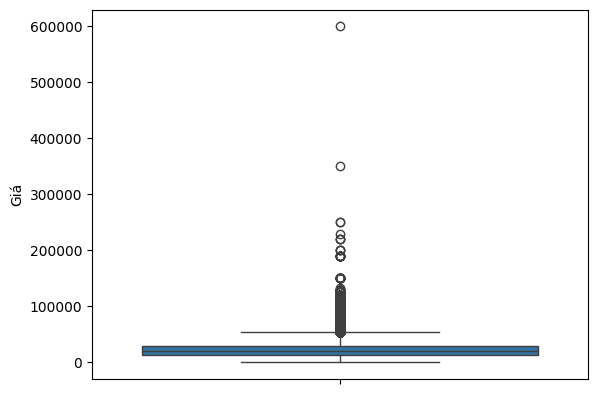

In [8]:
sns.boxplot(gia_rauqua)

## Kiểm tra từng mặt hàng riêng biệt

In [9]:
dataset = VNAgriDataset("../../data/Rau, qua")
outlier_filtered = dataset.get_outlier_mathang()

d:\University\Nam 3\HK3\Project 3\Code\src\preprocess\dataset.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  self.data = pd.read_html(html)[0]


In [10]:
outlier_filtered

('Chôm chôm',
 'Măng cụt',
 'Nhãn',
 'Dâu tây',
 'Na thái',
 'Cam canh',
 'Cam cara ruột đỏ',
 'Quýt Sài Gòn',
 'Na',
 'Lê xanh',
 'Đào mỏ quạ',
 'Xoài Đài Loan',
 'Vải',
 'Na Thái',
 'Sầu riêng cơm vàng hạt lép',
 'Xoài cát Hòa Lộc',
 'Sầu Riêng Ri 6',
 'Dừa xiêm lai',
 'Dừa xiêm xanh',
 'Mít ruột đỏ',
 'Cam sành (loại 2)',
 'Trái dứa/thơm',
 'Nhãn tiêu da bò',
 'Trái dứa/thơm (nhỏ)',
 'Đào',
 'Lựu',
 'Ổi',
 'Bông cải Xanh',
 'Quả bầu',
 'Mướp',
 'Trái dứa/thơm (to)',
 'Bưởi Diễn')

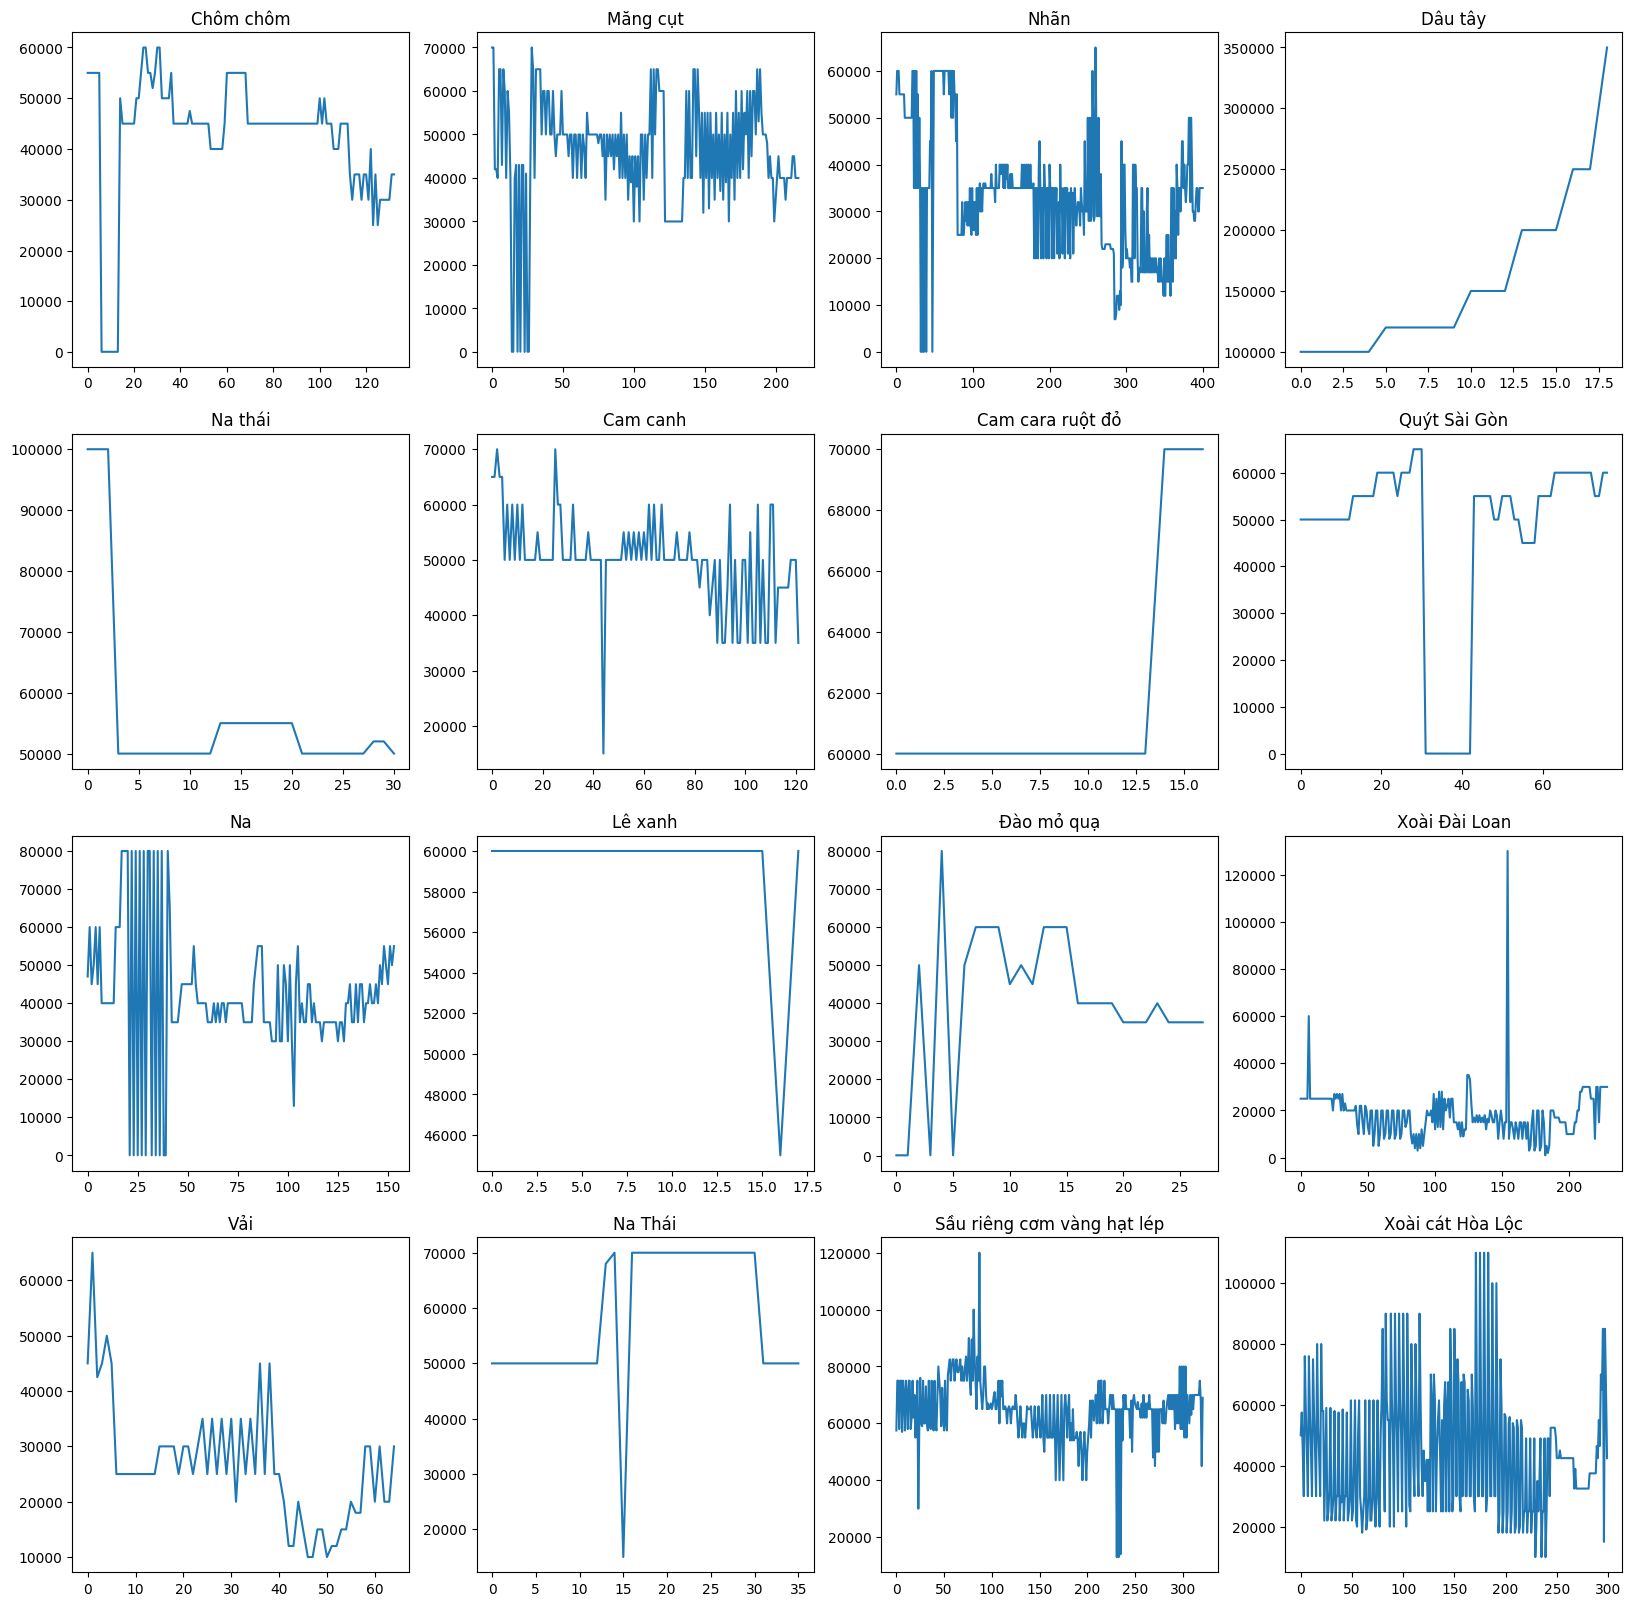

In [11]:
dataset.plot(outlier_filtered[:16], 4, 4)

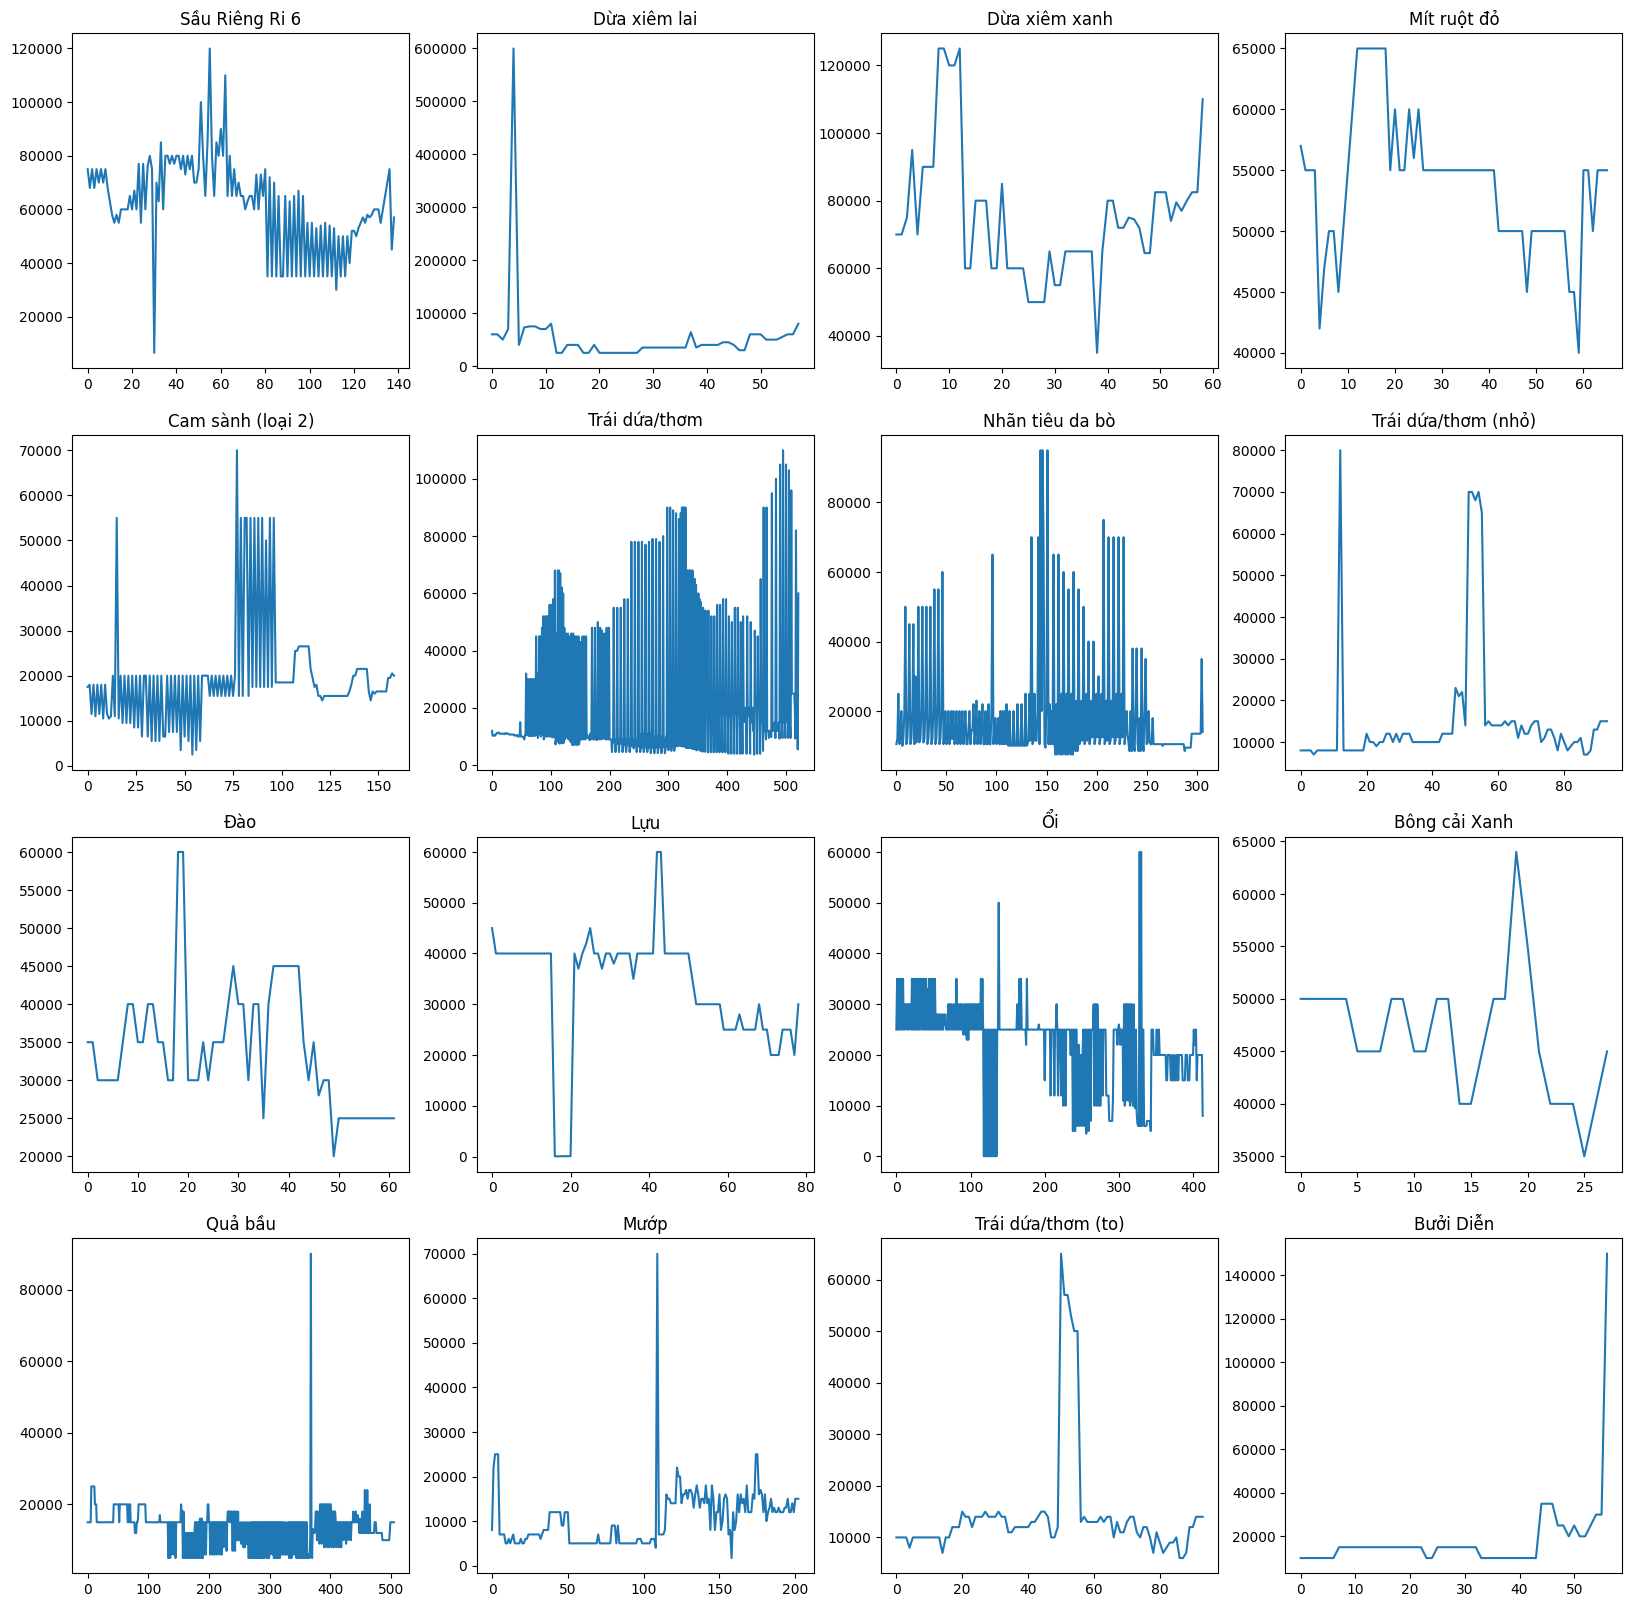

In [12]:
dataset.plot(outlier_filtered[16:32], 4, 4)

In [13]:
outlier_infos = dataset.get_outlier_infos()

In [14]:
names = [x[0] for x in outlier_infos]
min_vals = [x[4] for x in outlier_infos]
max_vals = [x[5] for x in outlier_infos]

### 0 - Chôm chôm

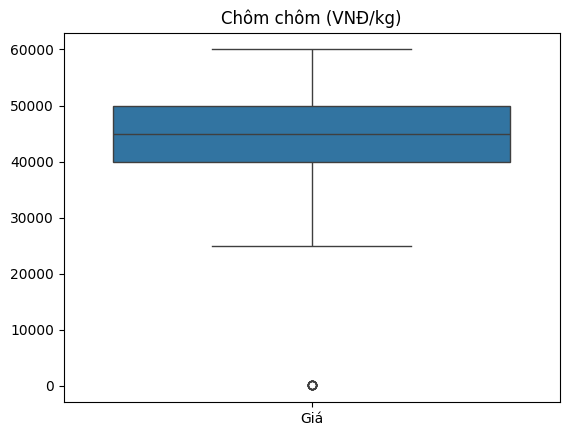

In [15]:
dataset.show_boxplot(names[0])

In [16]:
dataset.get_outlier_mathang_df(names[0], min_vals[0], max_vals[0])

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
4032,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-09-06,45.0
4114,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-30,55.0
4250,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-23,55.0
4386,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-16,55.0
4578,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-06,50.0
4631,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-08-02,50.0
4716,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-30,50.0
4773,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,2024-07-26,50.0


In [17]:
rauqua_df[rauqua_df["Tên_mặt_hàng"] == "Chôm chôm"]["Giá"].mean()

np.float64(42405.338345864664)

In [18]:
rauqua_df = dataset.change_outlier_values_df(
    names[0], 
    min_vals[0], 
    max_vals[0], 
    lambda x: x*1000, 
    inplace=True
)

In [19]:
outlier_0 = dataset.get_outlier_infos_one(names[0])
outlier_0

('Chôm chôm',
 np.float64(45000.0),
 np.float64(50000.0),
 np.float64(5000.0),
 np.float64(37500.0),
 np.float64(57500.0),
 np.int64(23))

In [20]:
dataset.get_outlier_mathang_df(outlier_0[0], outlier_0[4], outlier_0[5])

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
8467,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-10-20,60000.0
8514,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-10-17,60000.0
9034,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-09-26,60000.0
9110,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2023-09-22,60000.0
26026,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-09-16,35000.0
26093,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-09-14,30000.0
26178,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-09-10,35000.0
26217,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-09-09,35000.0
26283,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-09-07,35000.0
26383,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,2021-08-31,30000.0


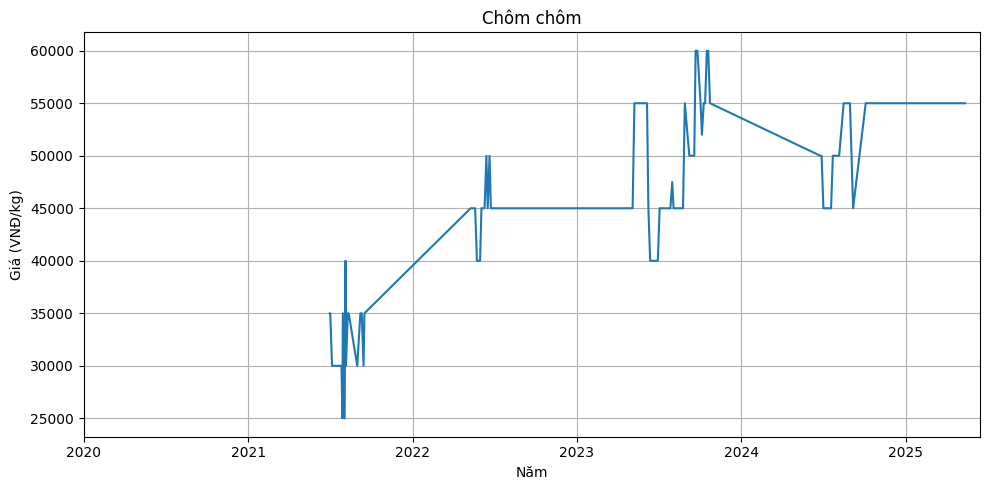

In [21]:
dataset.plot_one(outlier_0[0])